In [2]:
%load_ext autoreload
%autoreload 2
import os
os.chdir('../src/')

In [3]:
from pathlib import Path
import cv2
data_dir = Path('../data')

In [4]:
from histographer.analysis.image.segment import segment_rgb

tissue_samples = [cv2.cvtColor(cv2.imread(str(path)), cv2.COLOR_BGR2RGB) for path in data_dir.iterdir()]

In [24]:
# Segmentation
import numpy as np
from IPython.display import clear_output

def plot_segmentation(cutoff_nuc, cutoff_tis):
    
    fig, axs = plt.subplots(1, 2)
    fig.suptitle('Segmented images', fontsize='xx-large')
    fig.set_facecolor('white')
    fig.set_size_inches(20, 8)
    for i, sample in enumerate(tissue_samples):
        tissue, nucleus, no_class = segment_rgb(sample, parameters={'cutoff_nucleus': cutoff_nuc, 'cutoff_tissue': cutoff_tis})
        print(np.sum(tissue))
        manip = sample.copy()
        manip[tissue, ...] = [255, 0, 0]
        manip[nucleus, ...] = [0, 255, 0]
        manip[no_class, ...] = [0, 0, 255]
        axs[i].imshow(manip)
    clear_output(wait=True)
    plt.show()

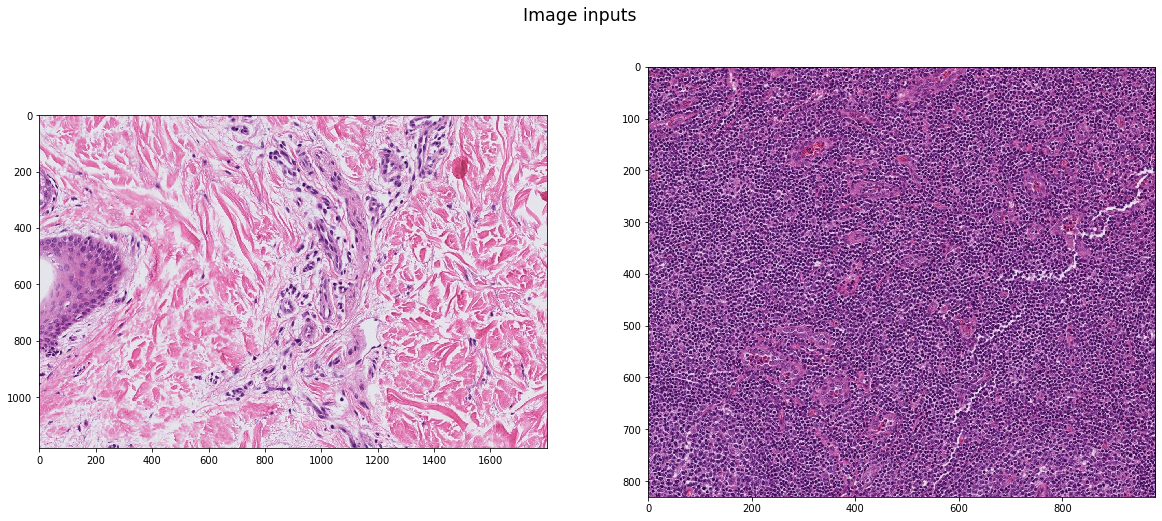

In [26]:
# Plot inputs
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2)
fig.suptitle('Image inputs', fontsize='xx-large')
fig.set_facecolor('white')
fig.set_size_inches(20, 8)
for i, sample in enumerate(tissue_samples):
    axs[i].imshow(sample)
plt.show()

In [28]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


interact(plot_segmentation, cutoff_nuc=widgets.IntSlider(min=80, max=120, step=1, value=100, continuous_update=False), cutoff_tis=widgets.IntSlider(min=80, max=120, step=1, value=100, continuous_update=False))

interactive(children=(IntSlider(value=100, continuous_update=False, description='cutoff_nuc', max=120, min=80)…

<function __main__.plot_segmentation(cutoff_nuc, cutoff_tis)>